# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import nimfa
# from matplotlib.colors import LinearSegmentedColormap
# default_cmap = LinearSegmentedColormap.from_list("default_cmap", ["navy", "white", "crimson"])
from functions.utils import *
from functions.plotting import *

ModuleNotFoundError: No module named 'portraits'

## Import data

Text(0.5, 1.0, 'Mean non-scaled absolute values')

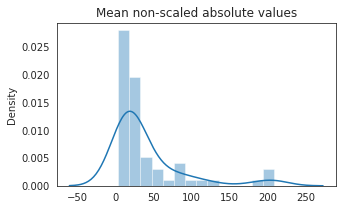

In [5]:
fc = pd.read_csv('/uftp/users/ashchetsova/hackathon/data_90_day.tsv', index_col=0,sep='\t')

to_drop = ['Th22 EM maturity and None expression', # high variability or potentially below lod
 'Th17.1 NV maturity and None expression',
 'Th22 CM maturity and None expression',
 'Th17 TE maturity and None expression',
 'Th1 EM maturity and None expression',
 'Th17.1 CM maturity and None expression',
 'CD8+ EMTM maturity and PD-1-TIGIT- expression',
 'Th17.1 TE maturity and None expression',
 'CD8+ EMTM maturity and PD-1-TIGIT+ expression',
 'Treg_Th1 None maturity and None expression',
 'CD8+ EMTM maturity and PD1+ expression',
 'Treg_Th17.1 None maturity and None expression',
 'Th17 EM maturity and None expression',
 'CD8+ EM maturity and None expression',
 'Treg None maturity and CD226+TIGIT- expression',
 'Th22 TE maturity and None expression',
 'Th17.1 EM maturity and None expression',
 'CD8+ EMTM maturity and CD39+ expression',
 'Th22 NV maturity and None expression',
 'Th17 NV maturity and None expression',
 'CD4+ EM maturity and None expression',
 'CD8+ EMTM maturity and PD-1+TIGIT+ expression','Th2 TE maturity and None expression', 'Th2 EM maturity and None expression']+['CD4+ EMTM maturity and None expression',# potentially dupes
 'CD8+ EMTM maturity and None expression',
 'CD4+ EM maturity and TIGIT+ expression',
 'CD8+ CM maturity and PD1+ expression',
 'CD4+ None maturity and TIGIT+ expression',
 'CD8+ None maturity and PD-1-TIGIT+ expression',
 'Treg None maturity and CD226+ expression',
 'CD4+ CM maturity and TIGIT+ expression']
fc = fc.drop(columns = to_drop)
anno = pd.read_csv('/uftp/users/ashchetsova/hackathon/total_annotation.tsv', index_col=0,sep='\t')
anno.index = anno.Sample_ID
anno = anno[['ID','cGVHD_development_time', 'cGVHD_development', 'Days','Day_after_transplant']]
anno = anno[~anno.index.duplicated()]
durations = pd.concat([anno[anno.cGVHD_development_time.isna()].ID.map(lambda x:anno[anno.ID==x].Day_after_transplant.max()),anno[~anno.cGVHD_development_time.isna()].cGVHD_development_time
                      ])
events = fc.GVHD_status
durations = durations.reindex(events.index)

fig,ax=plt.subplots(figsize=(5,3))
sns.distplot(fc.T.mean(),ax=ax)
plt.title('Mean non-scaled absolute values')

Text(0.5, 1.0, 'Mean log-scaled absolute values')

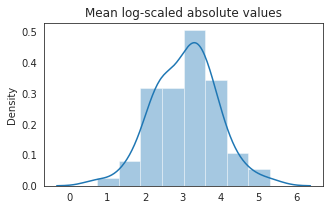

In [6]:
fc = np.log2(fc+1)
fig,ax=plt.subplots(figsize=(5,3))
sns.distplot(fc.T.mean(),ax=ax)
plt.title('Mean log-scaled absolute values')

Index(['CD4+ EMTM maturity and None expression', 'CD4+ EM maturity and CD226+ expression'], dtype='object') 1
Index(['CD8+ EMTM maturity and CD226+ expression', 'CD8+ EMTM maturity and None expression'], dtype='object') 1
Index(['CD4+ EM maturity and PD-1+TIGIT+ expression', 'CD4+ EM maturity and TIGIT+ expression'], dtype='object') 4
Index(['CD8+ CM maturity and PD-1+TIGIT+ expression', 'CD8+ CM maturity and PD1+ expression'], dtype='object') 2
Index(['CD4+ None maturity and TIGIT+ expression', 'CD4+ None maturity and PD-1+TIGIT+ expression'], dtype='object') 13
Index(['CD8+ None maturity and PD-1-TIGIT+ expression', 'CD8+ TE maturity and PD-1-TIGIT+ expression'], dtype='object') 1
Index(['Treg None maturity and CD226+TIGIT+ expression', 'Treg None maturity and CD226+ expression'], dtype='object') 1
Index(['CD4+ CM maturity and PD-1+TIGIT+ expression', 'CD4+ CM maturity and TIGIT+ expression'], dtype='object') 9


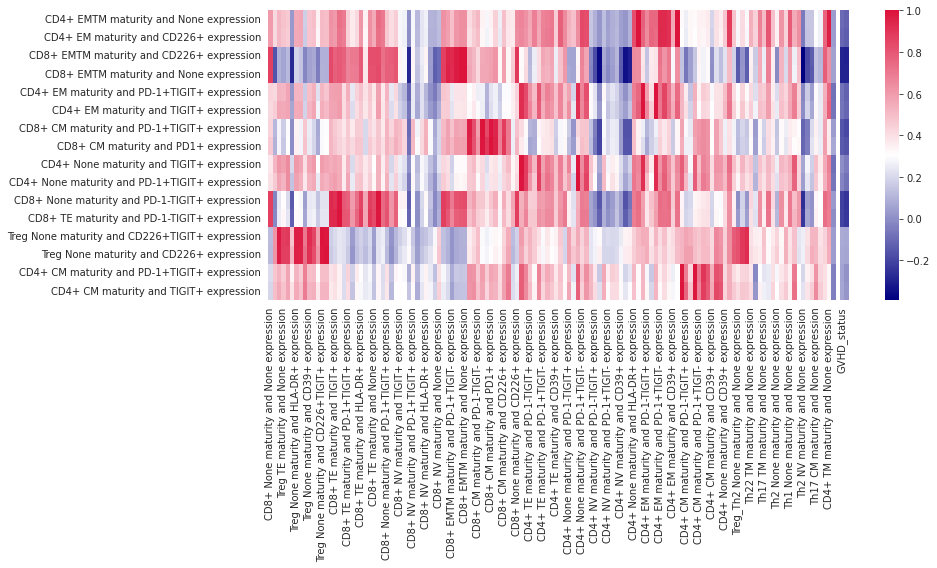

In [15]:
thr = 0.1
corrs = fc.corr(method='spearman').loc[fc.corr(method='spearman')[fc.corr(method='spearman')!=1].max().sort_values(ascending=False).index]
potential_corrs = []
similarity = []
start = 0
for i in range(2,len(corrs.index),2):
    cut = corrs[start:i]
    start = i
    cls = cut.columns.map(lambda x: 0 if np.isclose(cut[x].iloc[0],cut[x].iloc[1],atol=0.05,) else 1)
    similarity.append(np.mean(cls))
    if np.mean(cls)<thr:
        print(cut.index, np.sum(cls))
        potential_corrs+=cut.index.to_list()

plt.figure(figsize=(14,8))
sns.heatmap(corrs.loc[potential_corrs], cmap = default_cmap)
plt.tight_layout()
plt.savefig('potential_dupes_tight.png',dpi=300, bbox_inches='tight')